# Stationarity

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
# get datafile
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

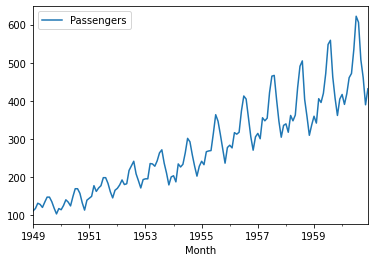

In [4]:
df.plot();

In [5]:
# run test for stationarity on passengers (we think this is not stationary)
adfuller(df['Passengers'])

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [6]:
# write helper function for this test
def adf(x):
    res = adfuller(x)
    print("Test Statistic: ", res[0])
    print("p-Value: ", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [7]:
adf(df['Passengers'])

Test Statistic:  0.8153688792060472
p-Value:  0.991880243437641
Non-Stationary


This time series is not stationary, as we expected.

In [8]:
# test on iid noise sampled from a standard normal -> should be stationary
adf(np.random.randn(100))

Test Statistic:  -10.840819507319043
p-Value:  1.6176996076527065e-19
Stationary


In [9]:
# test on a gamma distribution -> should be stationary
adf(np.random.gamma(1, 1, 100))

Test Statistic:  -5.83118877714053
p-Value:  3.971605975845817e-07
Stationary


In [10]:
df['LogPassengers'] = np.log(df['Passengers'])

In [11]:
# is LogPassengers stationary?
adf(df['LogPassengers'])

Test Statistic:  -1.7170170891069603
p-Value:  0.4223667747703914
Non-Stationary


In [12]:
# compute first difference of Passengers
df['Diff'] = df['Passengers'].diff()

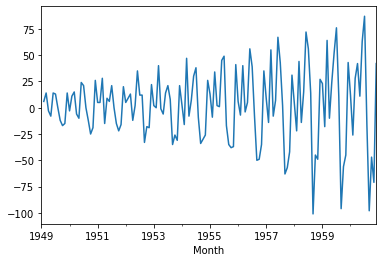

In [13]:
df['Diff'].plot();

In [14]:
# expect this to also be non-stationary as variance increases over time
adf(df['Diff'].dropna())

Test Statistic:  -2.8292668241700056
p-Value:  0.054213290283824704
Non-Stationary


In [15]:
# create first difference of LogPassengers
df['DiffLog'] = df['LogPassengers'].diff()

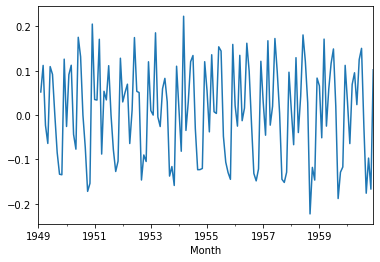

In [16]:
df['DiffLog'].plot();

In [17]:
# is DiffLog stationary?
adf(df['DiffLog'].dropna())

Test Statistic:  -2.7171305983881284
p-Value:  0.0711205481508595
Non-Stationary


This produces a higher p-value than when the variance was clearly increasing over time!

In [18]:
# switch to stock prices
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File ‘sp500sub.csv’ already there; not retrieving.



In [19]:
stocks = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [20]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [21]:
goog = stocks[stocks['Name'] == 'GOOG'][['Close']]

In [22]:
goog['LogPrice'] = np.log(goog['Close'])

In [23]:
goog['LogRet'] = goog['LogPrice'].diff()

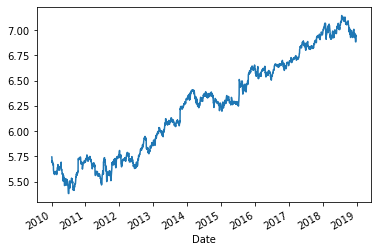

In [24]:
goog['LogPrice'].plot();

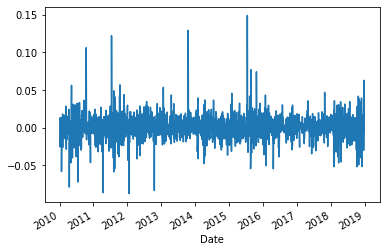

In [25]:
goog['LogRet'].plot();

In [26]:
# check for stationarity of LogPrice (expect non-stationary)
adf(goog['LogPrice'])

Test Statistic:  -0.41819025789061465
p-Value:  0.9070170677498406
Non-Stationary


In [28]:
# check for stationarity of LogRet (is this stationary?)
adf(goog['LogRet'].dropna())

Test Statistic:  -46.66748022773676
p-Value:  0.0
Stationary


In [29]:
# let's test another stock
sbux = stocks[stocks['Name'] == 'SBUX'][['Close']]
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['LogRet'] = sbux['LogPrice'].diff()

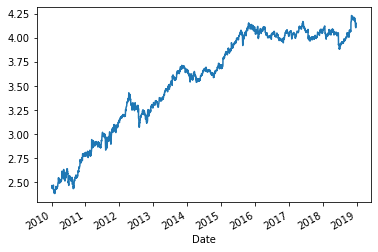

In [30]:
sbux['LogPrice'].plot();

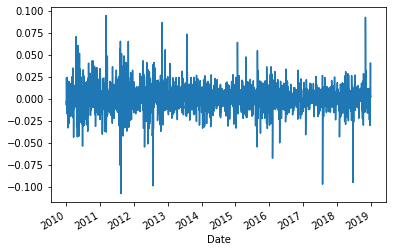

In [31]:
sbux['LogRet'].plot();

In [32]:
# saw similar pattern in graphs - same results for dickey-fuller test?
adf(sbux['LogPrice'])

Test Statistic:  -1.9020133583900034
p-Value:  0.33111455698537456
Non-Stationary


In [34]:
adf(sbux['LogRet'].dropna())

Test Statistic:  -30.086501426958055
p-Value:  0.0
Stationary
